In [16]:
participant_id = "P3"

In [17]:
%load_ext autoreload
%autoreload 2
from utils.face_analyzer import FaceAnalyzer
VIDEOS_FOLDER = "./MIT/Videos/"

face_analyzer = FaceAnalyzer()

frames = face_analyzer.get_video_frames_for_participant(
    participant_id, VIDEOS_FOLDER, num_selected_frames=5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lexical Features

In [1]:
# Specify the path to the audio file
from utils.lexical_analyser import lexicalanalyser


audio_file_path = "D:/Lexical analysis/Trimmed Audio/Trimmed_P1.wav"

# Create an instance of the lexicalanalyser class
analyser = lexicalanalyser(audio_file_path)

# Extract all features
features = analyser.extract_all_features()

# Print the extracted features
print(features)

LexicalFeatures(Total_words=514, Unique_words=282, Filler_words=18, Total_words_rate=3.1898916429803768, Unique_words_rate=1.750096193230479, Filler_words_rate=0.1117082676530093, Individual=35, We=9, They=1, Non_Fluences=18, PosEmotion=5, NegEmotion=0, Anxiety=1, Anger=0, Sadness=0, Cognitive=1, Inhibition=0, Preceptual=0, Relativity=0, Work=3, Swear=0, Articles=33, Verbs=65, Adverbs=41, Prepositions=56, Conjunctions=34, Negations=0, Quantifiers=1, Numbers=7)


# Facial Features

### Face Mesh

In [18]:
for frame in frames:
    detected_faces_landmarks = face_analyzer.process_image_results(frame.image)
    frame.facial_landmarks_obj= face_analyzer.get_largest_face_landmarks_obj(frame.image, detected_faces_landmarks)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark

### Face

In [19]:

for frame in frames:
    if frame.facial_landmarks:
        frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)

### Smile

In [20]:
import numpy as np


SMOOTH_WINDOW = 5
happiness_buffer = []
def smooth_happiness(happiness_prob):
    if happiness_prob is None:
        return 0 # TODO: change?
    happiness_buffer.append(happiness_prob)
    if len(happiness_buffer) > SMOOTH_WINDOW:
        happiness_buffer.pop(0)
    return np.mean(happiness_buffer)


for i, frame in enumerate(frames):
    face_roi = face_analyzer.get_face_roi_image(frame.image, frame.face, expand_ratio=1.1)
    frame.smile = smooth_happiness(face_analyzer.get_smile_from_frame(face_roi))

### Selected Facial Features

In [21]:
for frame in frames:
    frame.two_landmarks_connectors = face_analyzer.get_selected_facial_landmarks(frame.facial_landmarks)

### Head Pose

In [22]:

texts = []
for frame in frames:
    result = face_analyzer.get_face_angles(frame.image, frame.facial_landmarks)
    frame.face_angles = result

# Prosodic Extraction

In [23]:
from models.model_features import ProsodicFeatures
from utils.prosody_analyzer import ProsodyAnalyzer


prosody_analyzer = ProsodyAnalyzer(participant_id)
prosodic_features: ProsodicFeatures = prosody_analyzer.extract_all_features()

# Features Storage

### Facial Features Aggregation

In [24]:
from utils.feature_storage import FeatureStorage

feature_storage = FeatureStorage("./interview_features.csv")
facial_features = feature_storage.aggregate_facial_features(frames)

In [25]:
from utils.feature_storage import FeatureStorage

feature_storage.save_to_csv(participant_id, prosodic_features, facial_features)

# Display Frames

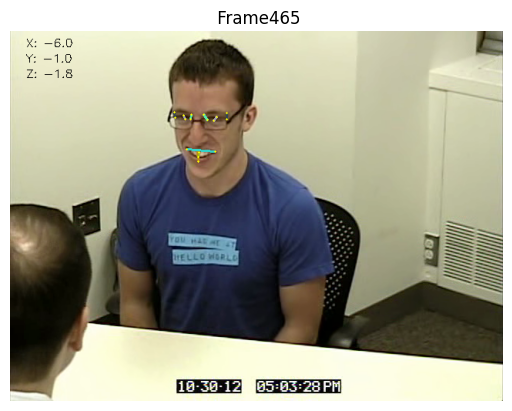

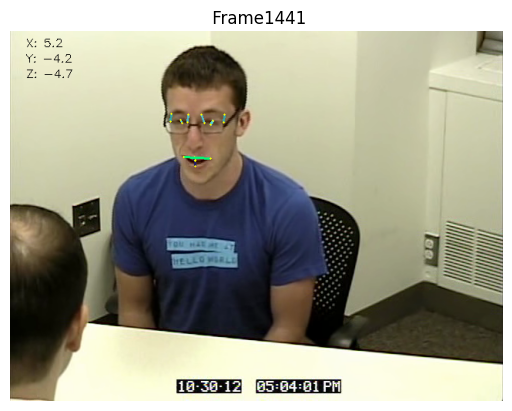

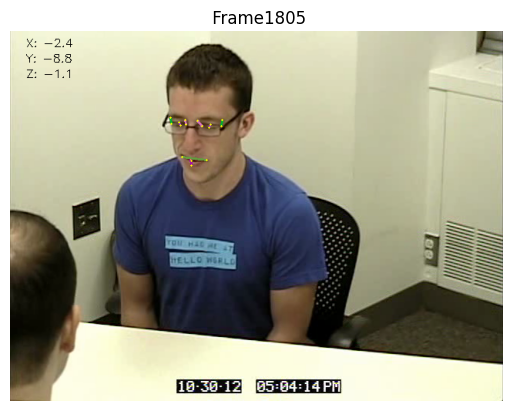

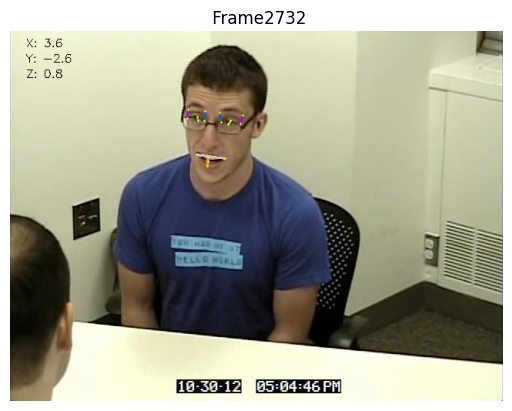

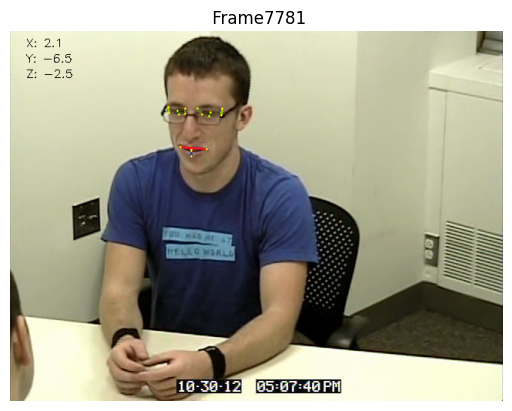

In [32]:
for frame in frames:
    frame.reset_drawable_image()
    # frame.draw_face_border()
    
    frame.draw_selected_facial_landmarks(draw_lines=True)
    
    frame.put_face_angles()
    # frame.draw_facial_landmarks()
    frame.display()